###### ### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2024 Semester 1

## Assignment 1: Wine quality classification with K-NN


**Student ID(s):**     `1346862`


## 0. Prepare

In [1]:
# Add the package here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

### 0.1 Overview of training dataset

In [2]:
# read training dataset
training_data = pd.read_csv('winequality-train.csv') 
# read testing dataset 
testing_data = pd.read_csv('winequality-test.csv')

In [3]:
# View the first 10 rows of the training dataset
training_data.head(10) 

,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol,quality
0,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,0.63,10.8,0
1,8.3,0.42,0.62,19.25,0.040,41.0,172.0,1.0002,2.98,0.67,9.7,0
2,6.6,0.17,0.38,1.50,0.032,28.0,112.0,0.9914,3.25,0.55,11.4,1
3,6.2,0.66,0.48,1.20,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,1
4,6.5,0.31,0.14,7.50,0.044,34.0,133.0,0.9955,3.22,0.50,9.5,0
5,6.4,0.31,0.38,2.90,0.038,19.0,102.0,0.9912,3.17,0.35,11.0,1
6,6.8,0.26,0.42,1.70,0.049,41.0,122.0,0.9930,3.47,0.48,10.5,1
7,7.6,0.67,0.14,1.50,0.074,25.0,168.0,0.9937,3.05,0.51,9.3,0
8,6.5,0.39,0.23,5.40,0.051,25.0,149.0,0.9934,3.24,0.35,10.0,0
9,7.3,0.24,0.39,17.95,0.057,45.0,149.0,0.9999,3.21,0.36,8.6,0


## 1. K-NN classifier

In [4]:
# Separate the feature and label of the training/testing dataset
x_train = training_data.drop(columns=['quality'])
y_train = training_data['quality']

x_test = testing_data.drop(columns=['quality'])
y_test = testing_data['quality']

The function of K-NN

In [5]:
''' K-NN classifier function
parameters:
x_dataset(dataframe): The dataset that needs to be predicted
x_train(dataframe): taining dataset which label is removed
y_train(dataframe): The label of taining dataset
return:
predicted(series): The label that knn predicted of x_dataset
'''
def Knn_predict(x_dataset, x_train, y_train, k):
    # Make predictions for each instance in x_dataset
    predicted = x_dataset.apply(predict_instance,axis = 1, x_train= x_train, y_train = y_train, k = k)
    predicted = pd.Series(predicted)
    return predicted


''' K-NN classifier function for one instance
parameters:
instance(series): An instance that contains a line of feature
x_train(dataframe): taining dataset which label is removed
y_train(dataframe): The label of taining dataset
k(scalar): Number of neighbors
return:
label(scalar): The label that knn predicted of instance
'''
def predict_instance(instance, x_train, y_train, k):
    # Calculate the distance 
    distances = calculate_Euclidean_Distance(instance, x_train)
    # Find the nearest k neighbor
    k_neighbors_label = find_k_neighbors_label(distances, k, y_train)
    # predict the label
    label = choose_the_label(k_neighbors_label,distances)
    return label


""" calculate the Euclidean distance between the instance and every instance of training set
parameters:
instance(series): one instance of testing instance
x_train(dataframe): taining dataset which label is removed
return:
didtances(series): Euclidean distance between the instance and every instance of training set
"""
def calculate_Euclidean_Distance(instance, x_train):
    distances = np.sqrt(((instance - x_train)**2).sum(axis = 1)) 
    return distances


''' Find the n neighbors closest to this instance in the training dataset
parameter:
didtances(series): Euclidean distance between the instance and every instance of training set
k(scalar): Number of neighbors
y_train(dataframe): The label of taining dataset
return:
k_neighbors_label(series): label of the nearest k neigbors
'''
def find_k_neighbors_label(distances, k, y_train):
    # Find the first k neighbors with the shortest distances
    top_k_plus_one = distances.sort_values().values[k-1]
    k_neighbors_distance = distances.loc[distances <= top_k_plus_one,] 
    # Find the lebal  of this index
    k_neighbors_label = y_train.loc[k_neighbors_distance.index]
    return k_neighbors_label

''' Finds the label that appears the most in a list of labels
parameters:
k_neighbors_label(series): label of the nearest k neigbors
distances(series): Euclidean distance between the instance and every instance of training set
return:
label(scalar): the label that given instance
'''
def choose_the_label(k_neighbors_label,distances):
    count = pd.Series()
    # Calculate the number of each label
    count.loc[0] = (k_neighbors_label== 0).sum()
    count.loc[1] = (k_neighbors_label == 1).sum()
    if (count.loc[0] > count.loc[1]):
        return 0
    elif(count.loc[0] < count.loc[1]):
        return 1
    # The quantity of both labels is the same
    elif (count.loc[0] == count.loc[1]):
        # use 1NN 
        neighbors_label_1 =  find_k_neighbors_label(distances, 1, y_train)
        if neighbors_label_1.shape[0] > 1:
            return(random.choices([0,1]))
        else:
            return neighbors_label_1.index[0]
    

## 2. 1-NN classification

### The accuracy of 1-NN classification

In [6]:
# The k-nn function is used to predict x_test, and k is 1
predicted = Knn_predict(x_test,x_train,y_train, k = 1)
# calculate the acurracy of 1—NN
(predicted == y_test).sum()/len(y_test)

0.7644444444444445

### Visualization

In [7]:
# When k is equal to 1-20, the accuracy of K-NN model
accuracies = pd.Series()
for k in range(1, 21):
    predicted = Knn_predict(x_test, x_train, y_train, k)
    accuracy = (predicted == y_test).sum()/len(y_test)
    accuracies[k] = accuracy

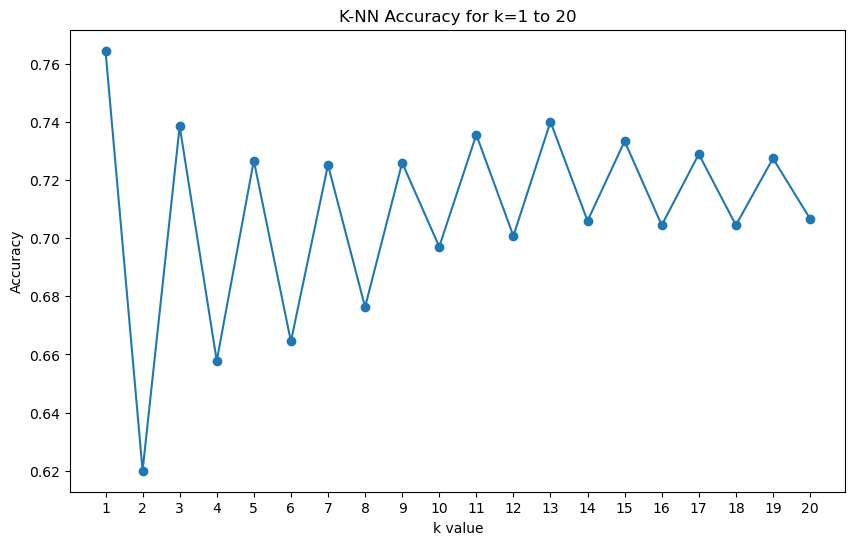

In [8]:
# draw the plot
plt.figure(figsize=(10, 6))
accuracies.plot(marker='o', title='K-NN Accuracy for k=1 to 20', xlabel='k value', ylabel='Accuracy')
plt.xticks(range(1, 21))
plt.show()

In [9]:
''' The function use to draw the scatter plot
parameter:
subset(dataframe): The dataset we use to draw the scatter plot
feature1(string): The feature in the subset we will use to draw
feature2(string): The feature in the subset we will use to draw   
'''
def plot_scatter_plot(subset,feature1,feature2):
    group_data_minMax = subset.groupby('quality')
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 6))
    for quality, instance in group_data_minMax:
        plt.scatter(instance[feature1], instance[feature2], label=f'Quality {quality}', s=100, alpha=0.7)

In [10]:
# Two features were selected to make scatter plot
feature_1 = 'residualSugar'
feature_2 = 'alcohol'

# Select a portion of the data in the training dataset to draw
subset = training_data.sample(150)[[feature_1,feature_2,'quality']]

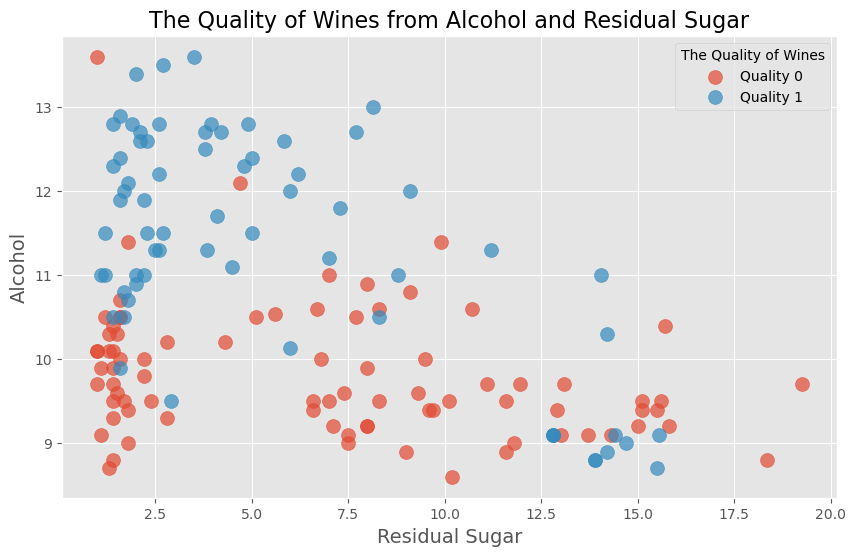

In [11]:
# plot scatter plot
plot_scatter_plot(subset,feature_1,feature_2)
plt.xlabel('Residual Sugar', fontsize=14)
plt.ylabel('Alcohol', fontsize=14)
plt.title('The Quality of Wines from Alcohol and Residual Sugar', fontsize=16)
plt.legend(title='The Quality of Wines')
plt.show()

## 3. Normalization

In [12]:
# Two features were selected to make scatter plot
feature_3 = 'totalSulfurDioxide'
feature_4 = 'citricAcid'

### 3.1 Min-Max Scale 

In [13]:
# The data were preprocessed with minMax scale
x_train_minMax_scale = (x_train - x_train.min())/(x_train.max()-x_train.min())
x_test_minMax_scale = (x_test - x_train.min())/(x_train.max()-x_train.min())                                     

In [14]:
# Prediction accuracy rate after data preprocessing with minMax scale method
predict_minMax_scale = Knn_predict(x_test_minMax_scale,x_train_minMax_scale,y_train,k = 1)
accuracy_minMax_scale = (predict_minMax_scale == y_test).sum()/len(y_test)
accuracy_minMax_scale

0.8503703703703703

In [36]:
# Select a portion of the data in the training dataset to draw
subset_minMax = x_train_minMax_scale.sample(150)[[feature_3,feature_4]]
subset_minMax['quality'] = y_train.loc[subset_minMax.index]

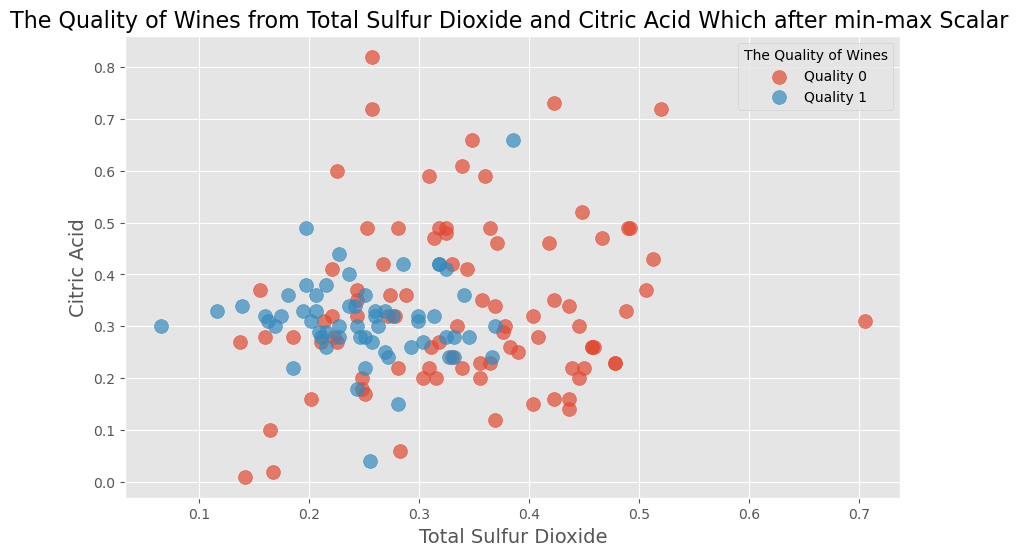

In [37]:
# plot the scatter plot
plot_scatter_plot(subset_minMax,feature_3,feature_4)
plt.xlabel('Total Sulfur Dioxide', fontsize=14)
plt.ylabel('Citric Acid', fontsize=14)
plt.title('The Quality of Wines from Total Sulfur Dioxide and Citric Acid Which after min-max Scalar ', fontsize=16)
plt.legend(title = 'The Quality of Wines')
plt.show()

###  3.2 Standardize

In [17]:
# The data were preprocessed with standardize
x_train_std = (x_train - x_train.mean())/(x_train.std())
x_test_std = (x_test - x_train.mean())/(x_train.std())

In [18]:
# Prediction accuracy rate after data preprocessing with standardiae
predict_std = Knn_predict(x_test_std,x_train_std,y_train,k = 1)
accuracy_std=(predict_std == y_test).sum()/len(y_test)
accuracy_std

0.8674074074074074

In [34]:
# Select a portion of the data in the training dataset to draw
subset_std = x_train_std.sample(150)[[feature_3,feature_4]]
subset_std['quality'] = y_train.loc[subset_std.index]

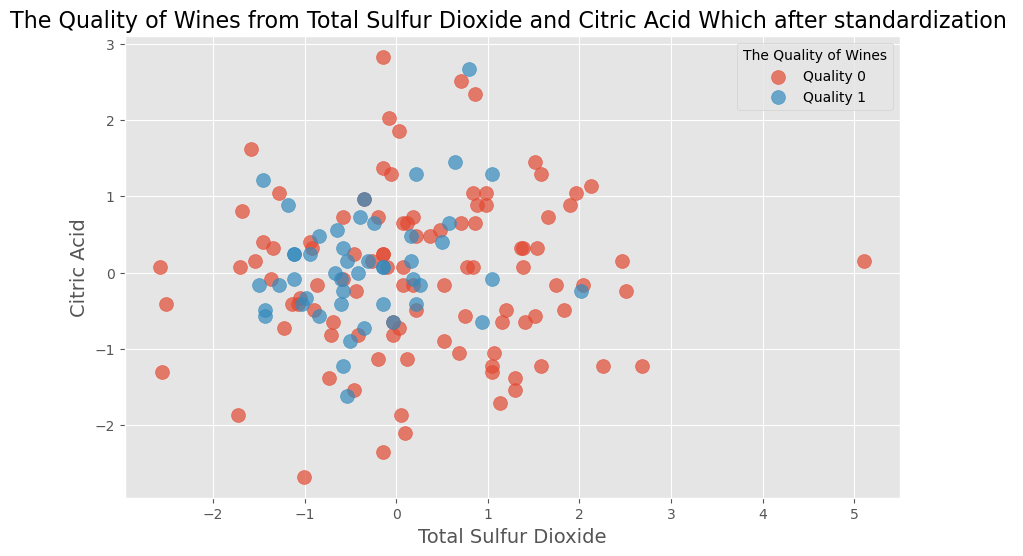

In [35]:
# draw the scatter plot
plot_scatter_plot(subset_std,feature_3,feature_4)
plt.xlabel('Total Sulfur Dioxide', fontsize=14)
plt.ylabel('Citric Acid', fontsize=14)
plt.title('The Quality of Wines from Total Sulfur Dioxide and Citric Acid Which after standardization ', fontsize=16)
plt.legend(title='The Quality of Wines')
plt.show()

### 3.3 without Normalization

In [32]:
# Select a portion of the data in the training dataset to draw
subset_normal = training_data.sample(150)[[feature_3,feature_4,'quality']]

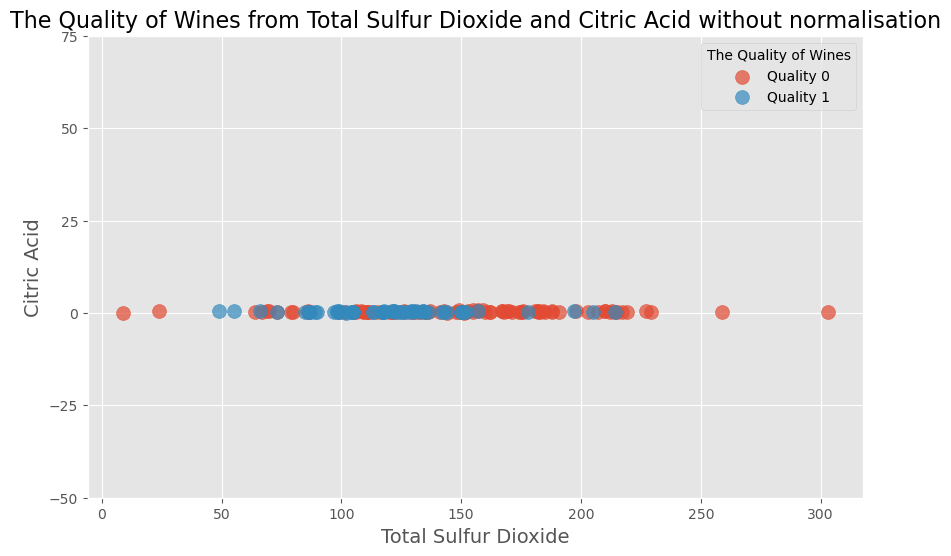

In [33]:
# Draw the scatter plot 
plot_scatter_plot(subset_normal,feature_3,feature_4)
plt.xlabel('Total Sulfur Dioxide', fontsize=14)
plt.ylabel('Citric Acid', fontsize=14)
plt.title('The Quality of Wines from Total Sulfur Dioxide and Citric Acid without normalisation', fontsize=16)
plt.legend(title='The Quality of Wines')
plt.yticks(np.arange(-50,100,step = 25))
plt.show()

## 4. Model extensions

### 4.1
Compare the performance of your best 1-NN model from Question 3 to a Gaussian naive Bayes model on this dataset (you may use library functions to implement the Gaussian naive Bayes model). In your write-up, state the accuracy of the naive Bayes model and identify instances where the two models disagree. Why do the two models classify these instances differently?

#### Gaussian naive Bayes model

In [23]:
# use Gaussian naive Bayes model to predict
gnb_function = GaussianNB().fit(x_train_std, y_train)
predict_gnb = gnb_function.predict(x_test_std)

In [24]:
# calulate the accuracy
accuracy_gnb = (predict_gnb == y_test).sum()/len(y_test)
accuracy_gnb

0.774074074074074

In [25]:
# Find different instances of predict
different_label = x_test_std.loc[(predict_std != predict_gnb)]
different_label

,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol
0,1.453948,-0.223450,0.643329,-0.987701,-0.540870,-1.317362,-1.727421,-1.119766,-1.312709,0.620320,1.206965
9,-0.807925,-1.201125,-0.003895,-1.057964,0.394352,-0.766335,-1.299387,-1.052044,0.902655,-0.244885,0.355306
18,0.620626,-0.401209,0.319717,1.431364,0.511255,0.941848,1.178703,1.148901,-1.245577,-0.417926,-1.038319
19,0.620626,-0.401209,0.319717,1.431364,0.511255,0.941848,1.178703,1.148901,-1.245577,-0.417926,-1.038319
23,-1.641247,1.687460,-2.673697,-0.977664,0.706093,-1.482670,-0.826297,-0.036223,2.983755,-0.764008,-0.573778
...,...,...,...,...,...,...,...,...,...,...,...
1302,0.025396,-0.934486,-0.165701,2.585689,-0.151194,0.170410,0.615501,1.839659,-1.715502,0.274238,-1.038319
1309,-2.236477,-0.490088,-1.136538,-0.275031,-0.151194,-0.986746,-0.871353,0.092447,3.252284,0.706840,-0.341507
1312,-1.165063,1.643021,-0.246605,-0.977664,-0.385000,-0.876541,-1.389499,-1.197645,1.909639,-0.590967,1.129542
1315,0.263488,-0.490088,0.077008,-1.037889,-0.073259,-1.592876,-0.172982,-0.943690,-0.171461,-0.244885,0.587576


In [26]:
# Of the two models with different predictions, which one was right
different_indices = (predict_std != predict_gnb)
correct_1nn = sum((predict_std[different_indices] == y_test[different_indices]))
print(correct_1nn)
correct_gnb = sum((predict_gnb[different_indices] == y_test[different_indices]))
print(correct_gnb)


199
73


### The correlation between the feature group by label

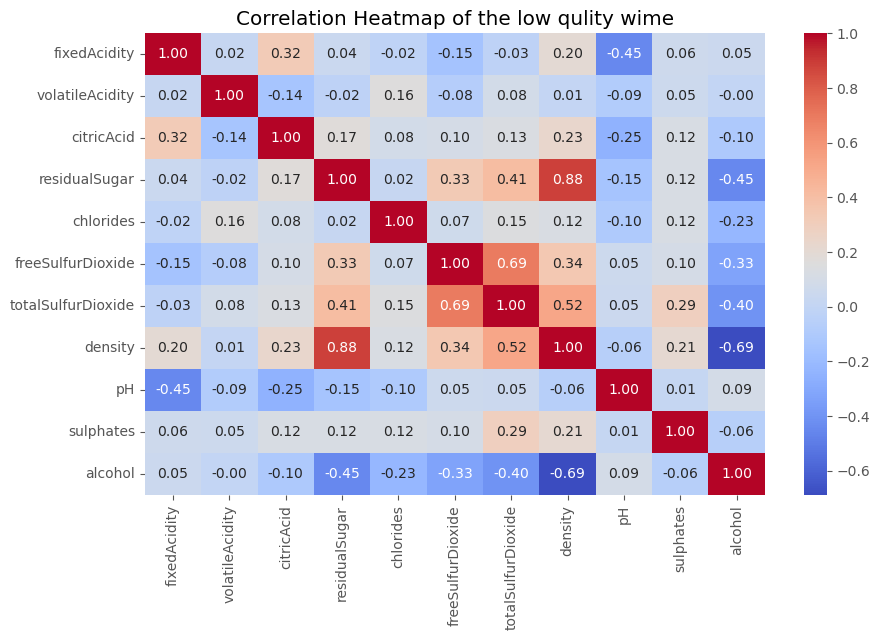

In [27]:
# The correlation between the feature, the label is 0 
correlation_matrix_0 = x_train_std.loc[y_train == 0].corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix_0, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of the low qulity wime')
plt.show()

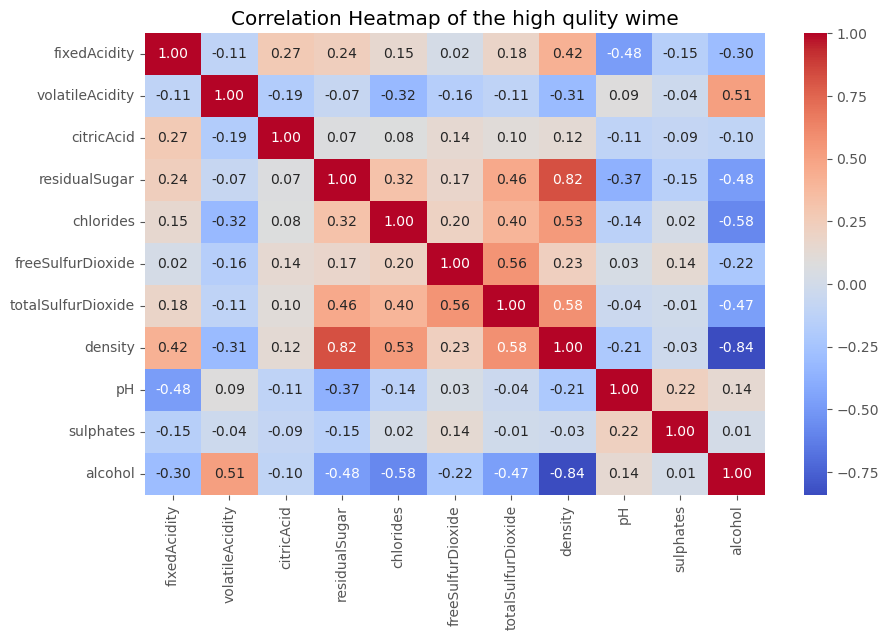

In [28]:
# The correlation between the feature, the label is 1
correlation_matrix_1 = x_train_std.loc[y_train == 1].corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of the high qulity wime')
plt.show()

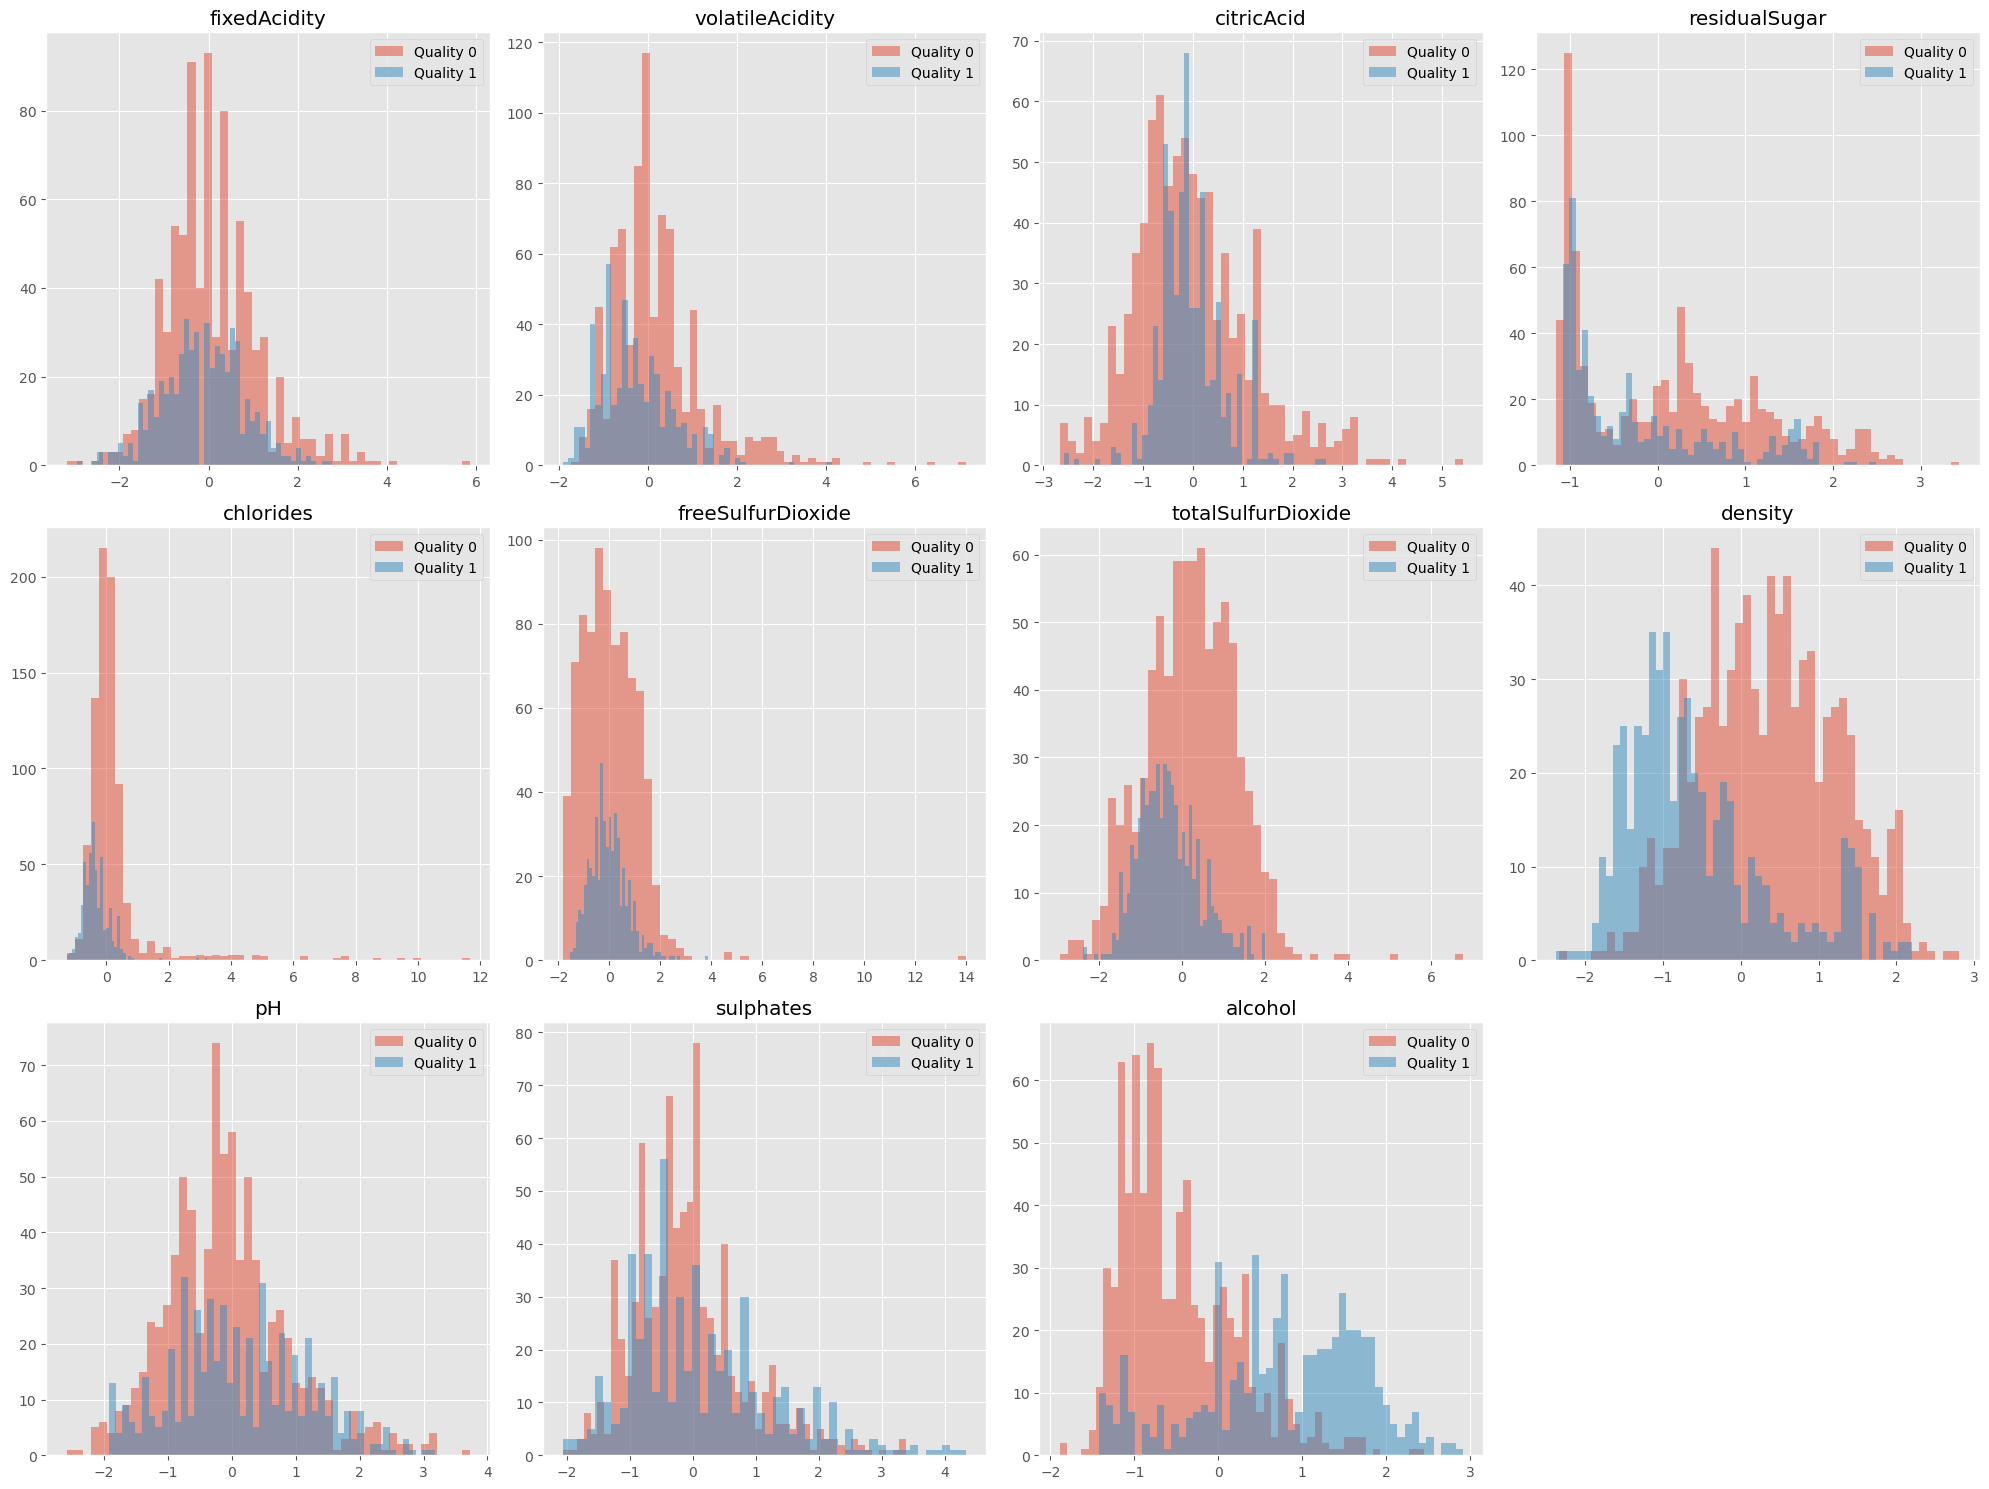

In [29]:
# distribution of each feature
features = x_train_std.columns[:]
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)
    for quality in (0,1):
        subset = x_train_std.loc[y_train == quality]
        plt.hist(subset[feature], bins=50, alpha=0.5, label=f'Quality {quality}')
    plt.title(feature)
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()